In [2]:
! pip install openpyxl

In [3]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_excel("../crawling/data/all_comments.xlsx", engine='openpyxl')
df.head()

,Unnamed: 0,contents,point
0,0,다 알바임?\n\n밥은 말랐고 회는 ..\n\n하.. \n\n오랜만이네 1점.,1
1,1,세번 방문했는데 갈 때마다 만족했습니다. 바쁘고 정신 없을텐데도 사장님분들 넘 친절...,5
2,2,친절하신데ㅜ 초밥 맛은 그냥...,3
3,3,가장 먹을만한게 활어라 활어를 3-4번 시켜먹었는데 그만 먹길 바라셨는지.. 제가 ...,2
4,4,"가성비 좋고, 사장님도 너무 친절하셨어요👍🏻👍🏻",4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5793 entries, 0 to 5792
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5793 non-null   int64 
 1   contents    5030 non-null   object
 2   point       5793 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 135.9+ KB


In [6]:
df.isnull().sum()

Unnamed: 0      0
contents      763
point           0
dtype: int64

In [7]:
print(df['contents'].nunique())
df = df.drop_duplicates(subset=['contents'])
df.nunique()

4923


Unnamed: 0    4924
contents      4923
point            5
dtype: int64

In [8]:
df = df.dropna(how='any')
df.isnull().values.sum()

0

In [9]:
import re

df['contents'] = df['contents'].apply(lambda x : re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", x))
df.head()

,Unnamed: 0,contents,point
0,0,다 알바임밥은 말랐고 회는 하 오랜만이네 점,1
1,1,세번 방문했는데 갈 때마다 만족했습니다 바쁘고 정신 없을텐데도 사장님분들 넘 친절하...,5
2,2,친절하신데ㅜ 초밥 맛은 그냥,3
3,3,가장 먹을만한게 활어라 활어를 번 시켜먹었는데 그만 먹길 바라셨는지 제가 활어를 또...,2
4,4,가성비 좋고 사장님도 너무 친절하셨어요,4


In [10]:
df.loc[df['contents'] =='', 'contents'].value_counts()

contents
    10
Name: count, dtype: int64

In [11]:
df['contents'].replace("", np.nan, inplace=True)
df = df.dropna(how='any')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4913 entries, 0 to 5791
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4913 non-null   int64 
 1   contents    4913 non-null   object
 2   point       4913 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 153.5+ KB


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4913 entries, 0 to 5791
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4913 non-null   int64 
 1   contents    4913 non-null   object
 2   point       4913 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 153.5+ KB


<Axes: xlabel='point'>

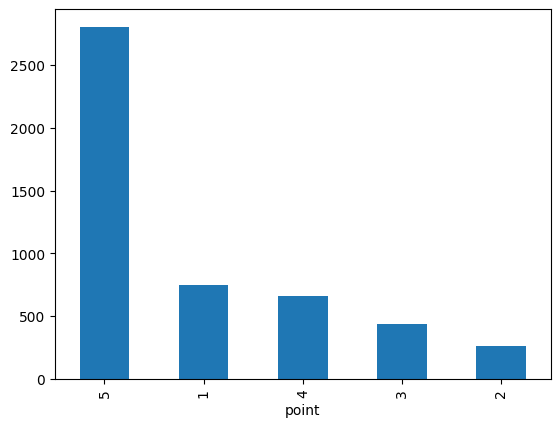

In [13]:
df['point'].value_counts().plot(kind='bar')

In [14]:
df['label'] = df['point'].apply(lambda x: 0 if x in [1, 2, 3] else 1)

In [15]:
negative_count = df[df['label'] == 0].shape[0]
positive_sample = df[df['label'] == 1].sample(n=negative_count, random_state=42)
df = pd.concat([df[df['label'] == 0], positive_sample])
df['label'].value_counts()

label
0    1447
1    1447
Name: count, dtype: int64

In [16]:
df.loc[df['label']== 1]

,Unnamed: 0,contents,point,label
4435,4435,완전 맛있어요ㅠㅜㅜ신기하게 새콤한 맛이나요,5,1
718,718,냉메밀이랑 라멘 선주문 후 분 웨이팅메밀도 맛있었지만 라멘이 확실히 더 맛있었다메밀...,4,1
5147,5147,빙수 맛있음 여러종류 있음 양도있음,4,1
5762,5762,홍대에서 고기를 구워주는 소고기 맛집,5,1
2732,2732,칼칼한 국물 맛이 좋았고 비린내가 없는 훌륭한 조림,5,1
...,...,...,...,...
4154,4154,너무 맛있어용 잘 먹구 갑니당,5,1
2637,2637,가성비 좋고 맛있네요 ㅋㅎ 혼밥 최공,5,1
2601,2601,그냥 괜찮은데 뭘더바람ㅋㅋ국밥집에서,4,1
181,181,노포지만 깔끔하고 주력 평냉 맛있다술 안주들도 가성비 좋고 솜씨 좋음,4,1


In [17]:
df.to_excel('data/comments_preprocessed.xlsx')